EDA Of Student Performance Indicator

IMPORTING LIBRARIES

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [159]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [160]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [161]:
df.shape

(1000, 8)

Dataset Information

1. gender : sex of students -> (Male/female)
2. race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
3. parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
4. lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
5. math score
6. reading score
7. writing score

Checking Null Values

In [162]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Checking Duplicate Values

In [163]:
df.duplicated().sum()

0

Checking Data Types

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking Unique values for each column

In [165]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Stats Of Data

In [166]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [167]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [168]:
columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in columns:
        print(f"\nCategories in '{col}' Variable:", df[col].unique())


Categories in 'gender' Variable: ['female' 'male']

Categories in 'race/ethnicity' Variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental level of education' Variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' Variable: ['standard' 'free/reduced']

Categories in 'test preparation course' Variable: ['none' 'completed']


Defining Numerical & Categorical Columns

In [169]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding Total & Average Scores Columns

In [170]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


No Of Students With Full Marks by {Maths, Writing, Reading} Scores

In [171]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


No Of Students With <=20 by {Maths, Writing, Reading} Scores

In [172]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


DATA VISUALIZATION

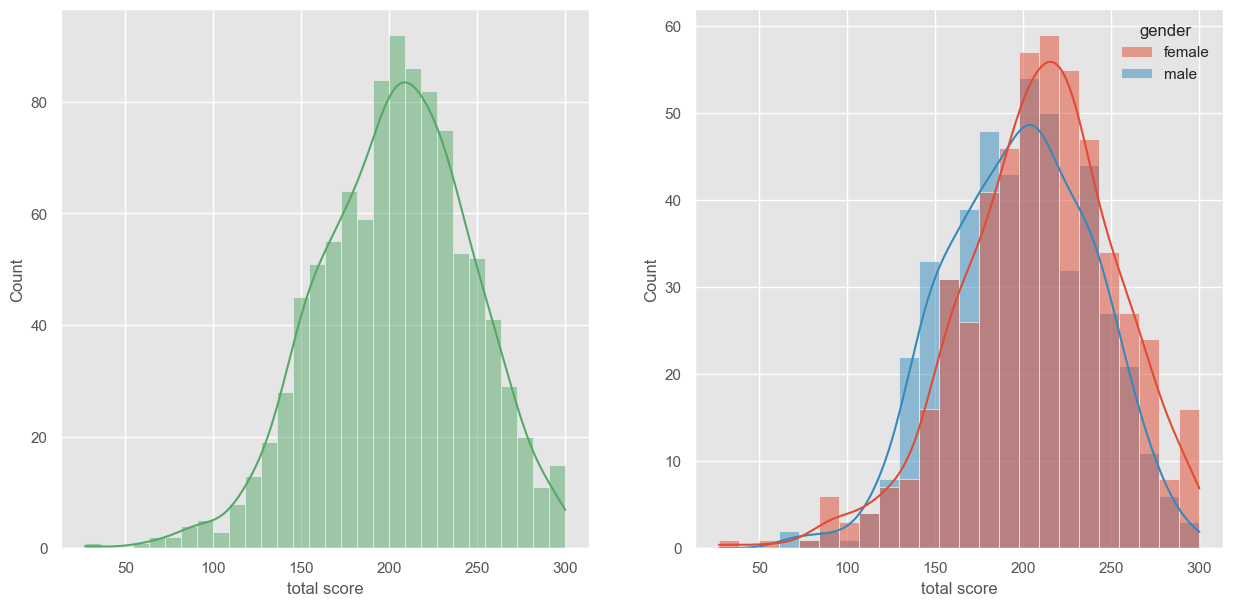

In [173]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

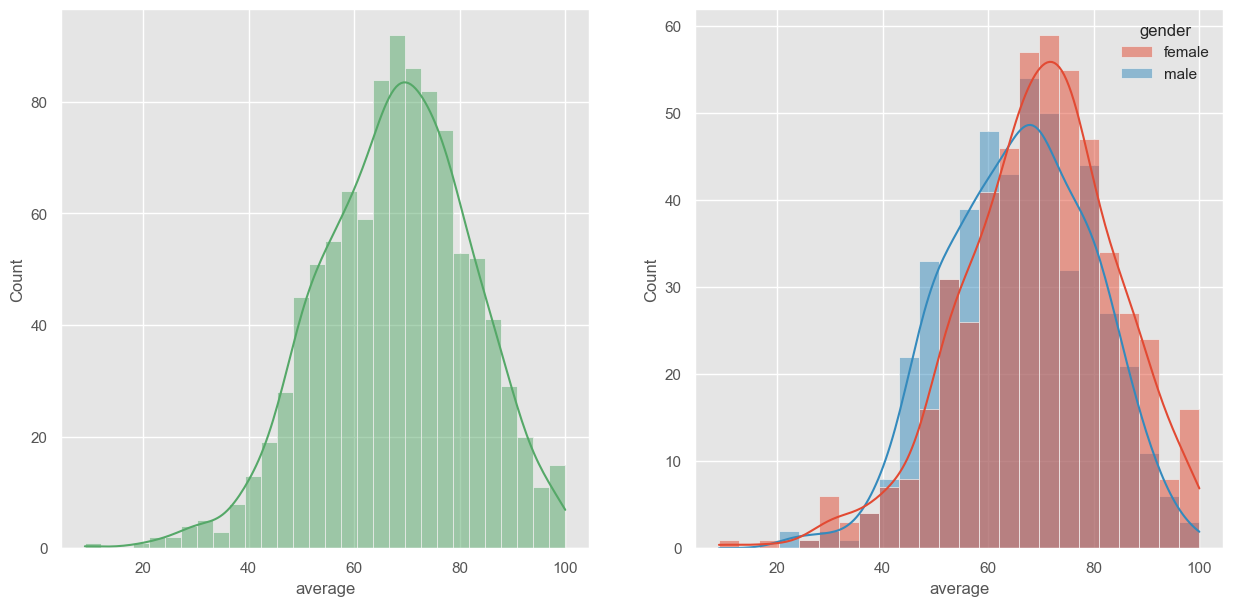

In [174]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

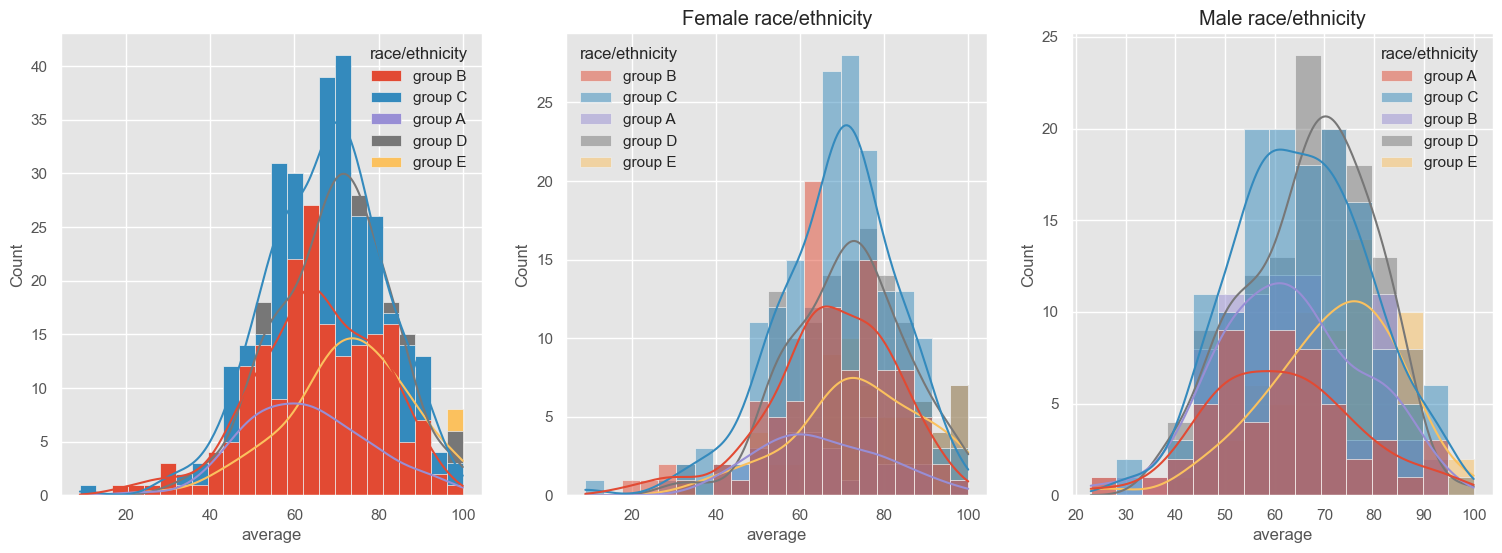

In [175]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity', alpha =1.0)
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.title('Female race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.title('Male race/ethnicity')
plt.show()

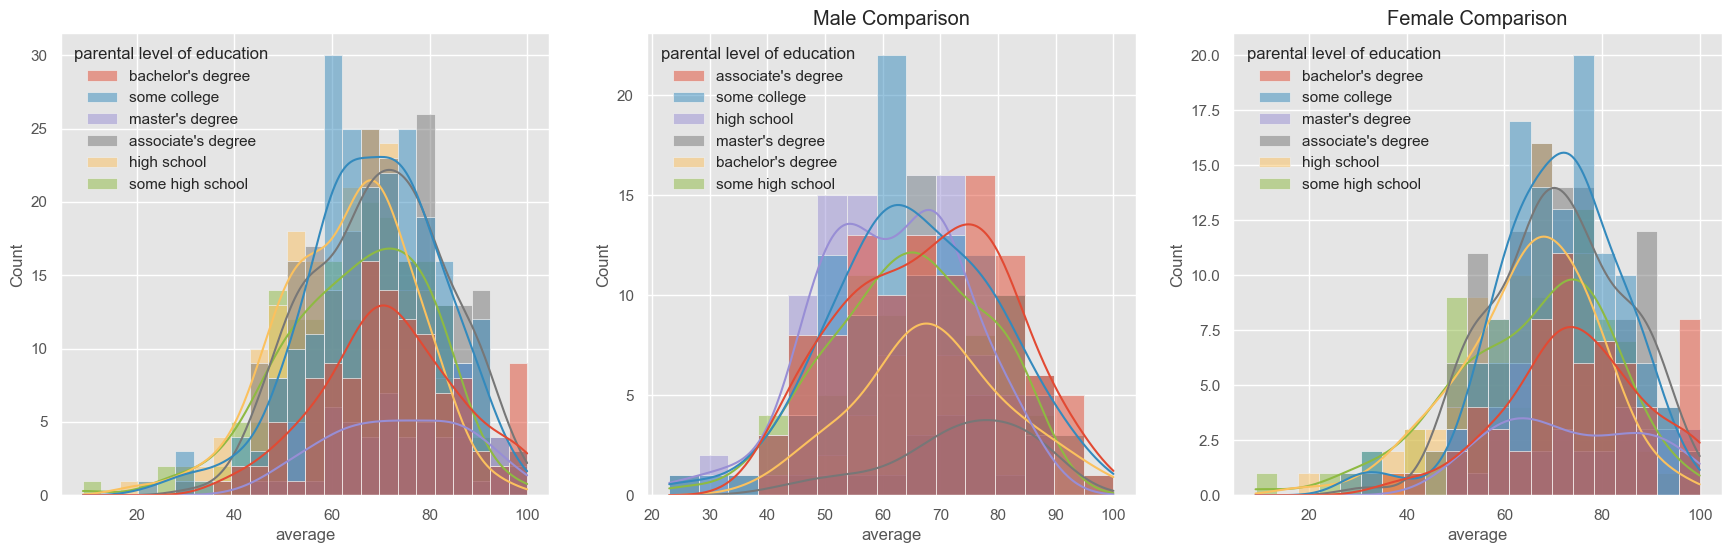

In [176]:
plt.subplots(1,3,figsize=(29,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
plt.title('Male Comparison')
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
plt.title('Female Comparison')
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

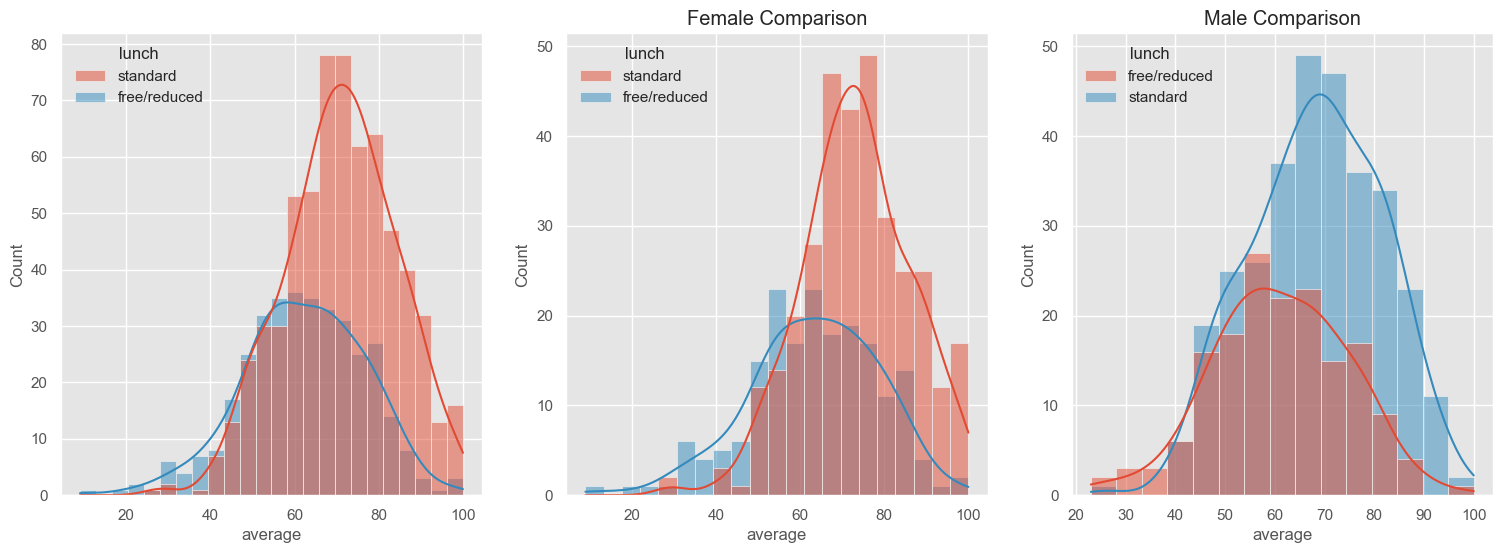

In [177]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.title('Female Comparison')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.title('Male Comparison')
plt.show()

VIOLIN PLOT of {Math, Reading, Writing} Scores

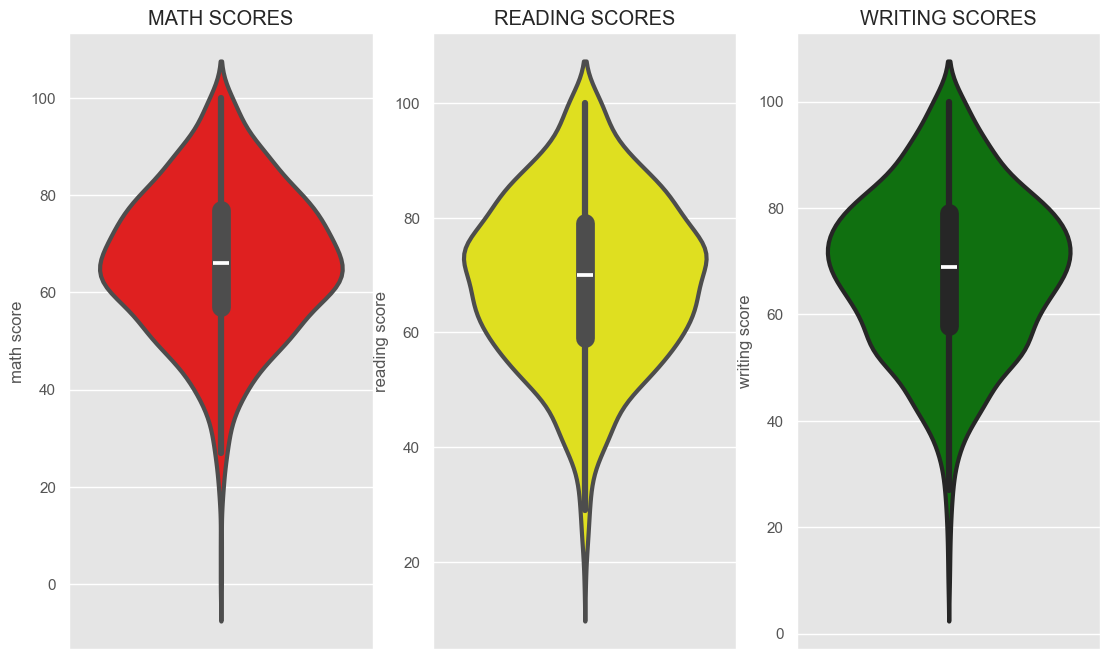

In [178]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='yellow',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='green',linewidth=3)
plt.show()

UNIVARIATE ANALYSIS

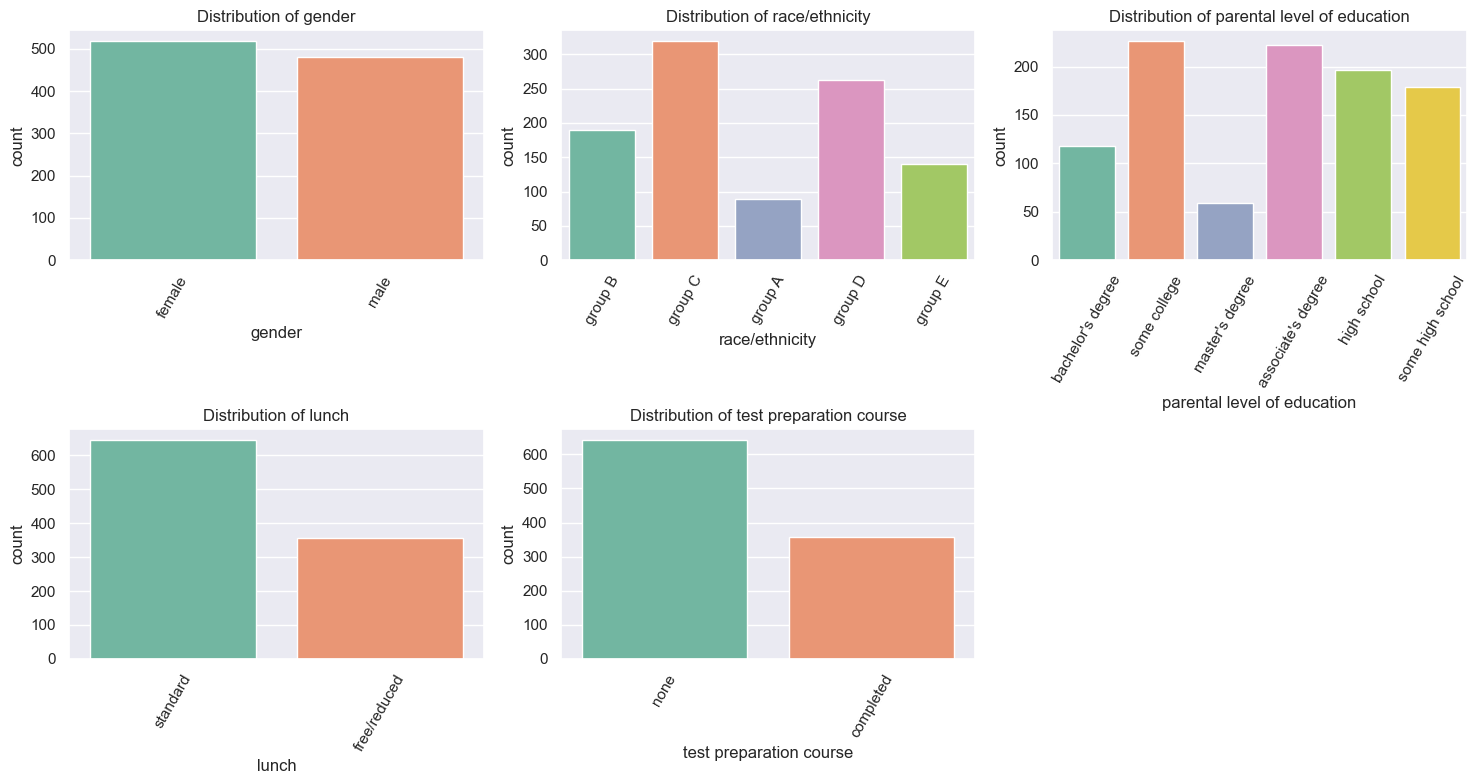

In [179]:
# Set style
sns.set(style="darkgrid")

# Plot Count Plots
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
plt.figure(figsize=(15, 8))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[feature], palette="Set2")
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

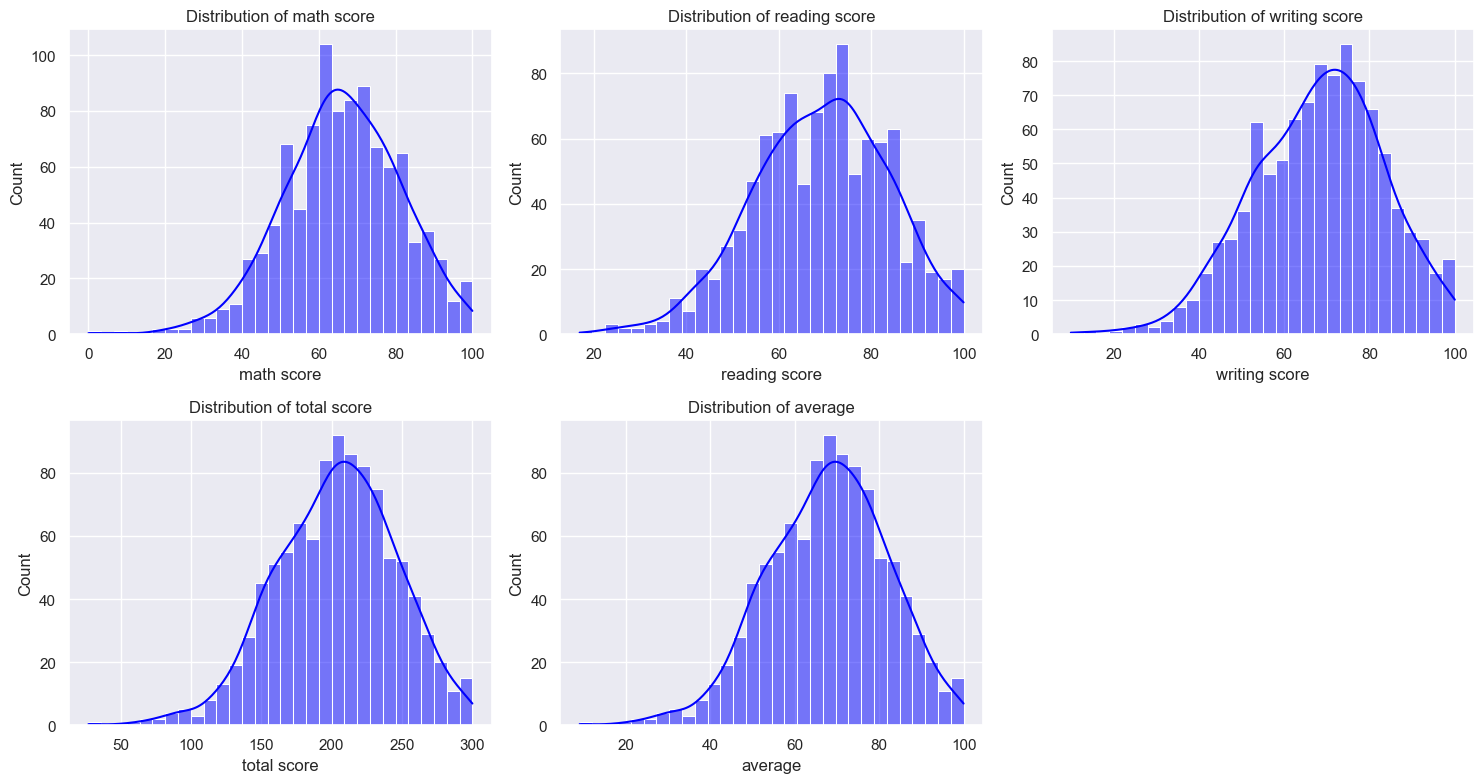

In [180]:
numerical_features = ['math score', 'reading score', 'writing score', 'total score', 'average']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color="blue")
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Univariate Analysis Insights:

1. Gender distribution is nearly balanced (Male: 52%, Female: 48%).
2. Most students belong to Group C or Group D.
3. Majority of students’ parents have attended some college or have an associate’s degree.
4. Standard lunch is more common than free/reduced lunch.
5. Most students did not complete the test preparation course.

BIVARIATE ANALYSIS

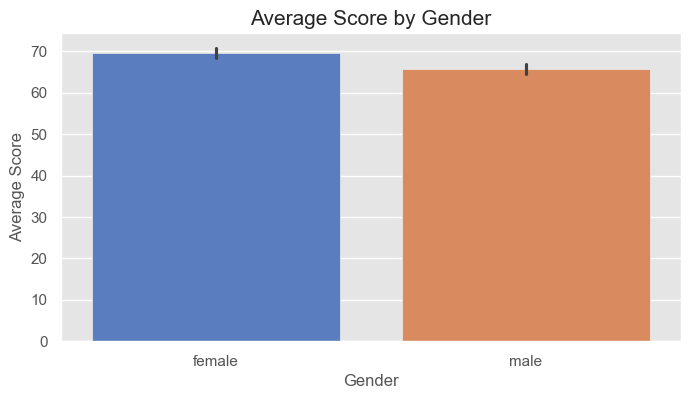

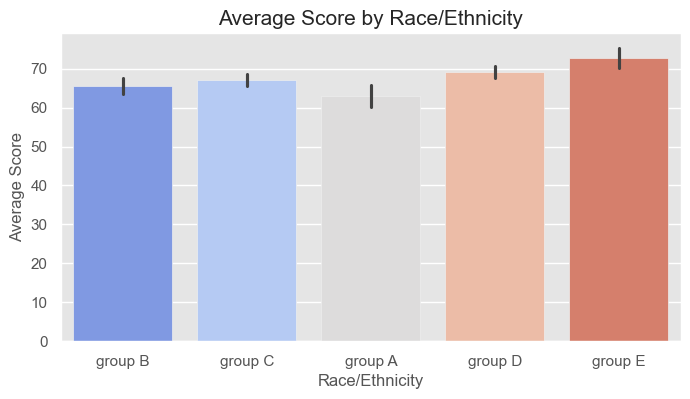

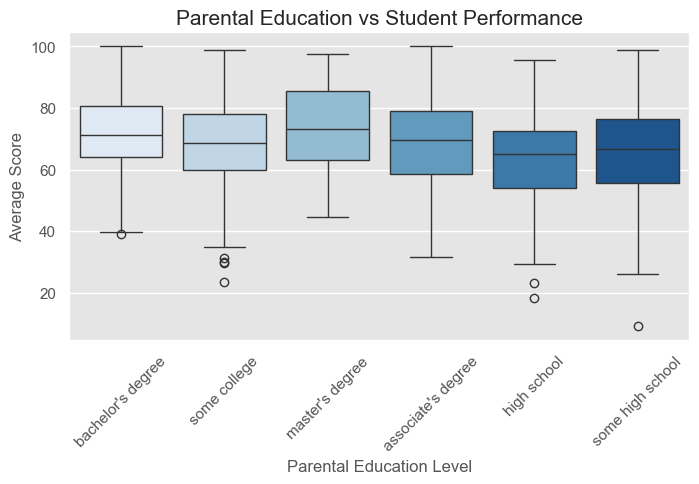

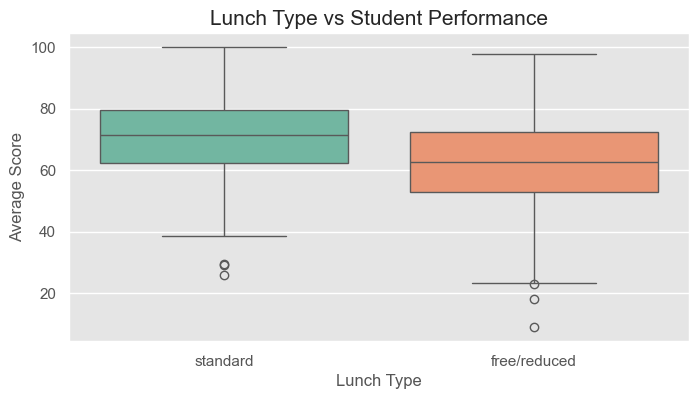

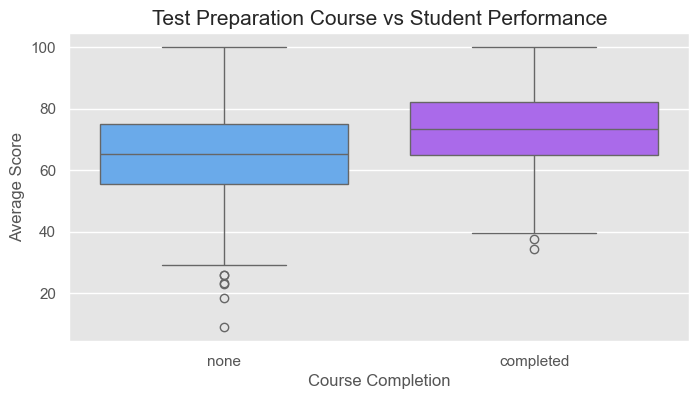

In [181]:
# Set plot style
plt.style.use('ggplot')

# Gender-wise Performance Comparison
plt.figure(figsize=(8, 4))
sns.barplot(x=df['gender'], y=df['average'], palette='muted')
plt.title("Average Score by Gender", fontsize=15)
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()

# Race/Ethnicity-wise Performance Comparison
plt.figure(figsize=(8, 4))
sns.barplot(x=df['race/ethnicity'], y=df['average'], palette='coolwarm')
plt.title("Average Score by Race/Ethnicity", fontsize=15)
plt.xlabel("Race/Ethnicity")
plt.ylabel("Average Score")
plt.show()

# Parental Education Level vs Student Performance
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['parental level of education'], y=df['average'], palette='Blues')
plt.title("Parental Education vs Student Performance", fontsize=15)
plt.xlabel("Parental Education Level")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

# Lunch Type vs Performance
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['lunch'], y=df['average'], palette='Set2')
plt.title("Lunch Type vs Student Performance", fontsize=15)
plt.xlabel("Lunch Type")
plt.ylabel("Average Score")
plt.show()

# Test Preparation Course Effect on Performance
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['test preparation course'], y=df['average'], palette='cool')
plt.title("Test Preparation Course vs Student Performance", fontsize=15)
plt.xlabel("Course Completion")
plt.ylabel("Average Score")
plt.show()

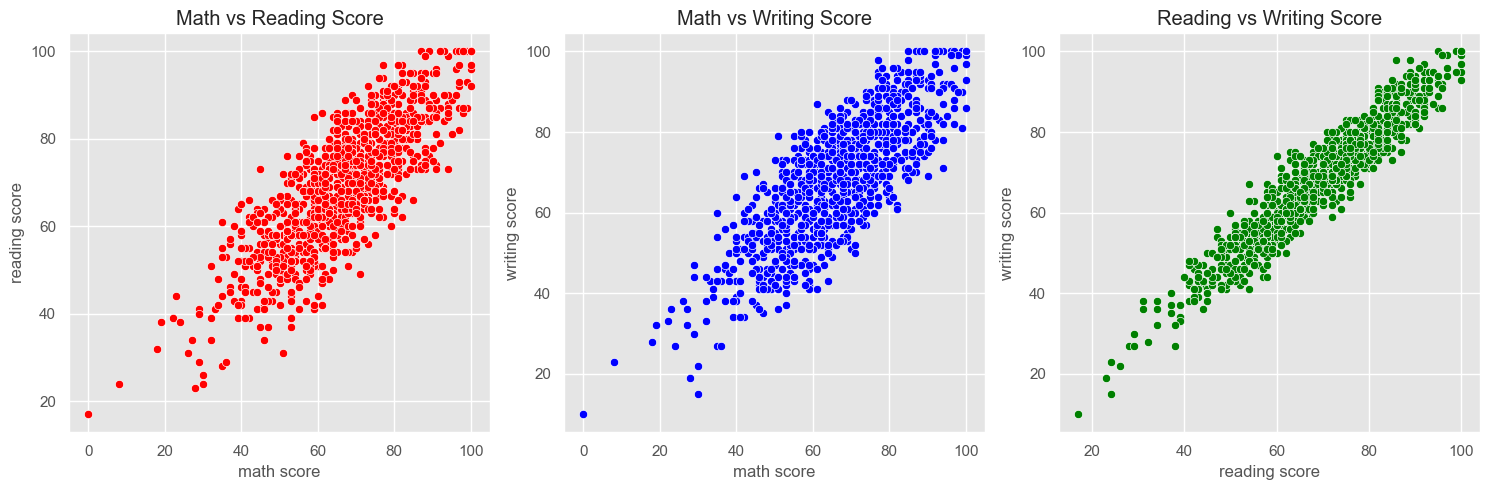

In [182]:
plt.figure(figsize=(15, 5))

# Math vs Reading Score
plt.subplot(1, 3, 1)
sns.scatterplot(x='math score', y='reading score', data=df, color="red")
plt.title("Math vs Reading Score")

# Reading vs Writing Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='reading score', y='writing score', data=df, color="green")
plt.title("Reading vs Writing Score")

# Math vs Writing Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='math score', y='writing score', data=df, color="blue")
plt.title("Math vs Writing Score")

plt.tight_layout()
plt.show()

Bivariate Analysis Insights:

1. Female students tend to have a higher overall average score.
2. Male students score slightly better in Math.
3. Group E students perform the best, while Group A performs the worst.
4. Students with parents having a Bachelor’s or Master’s degree perform better.
5. Students who had a Standard Lunch performed better than those on free/reduced lunch.
6. Completing the test preparation course slightly improves performance.

MULTIVARIATE ANALYSIS

In [183]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])
numerical_df.head()

,math score,reading score,writing score,total score,average
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


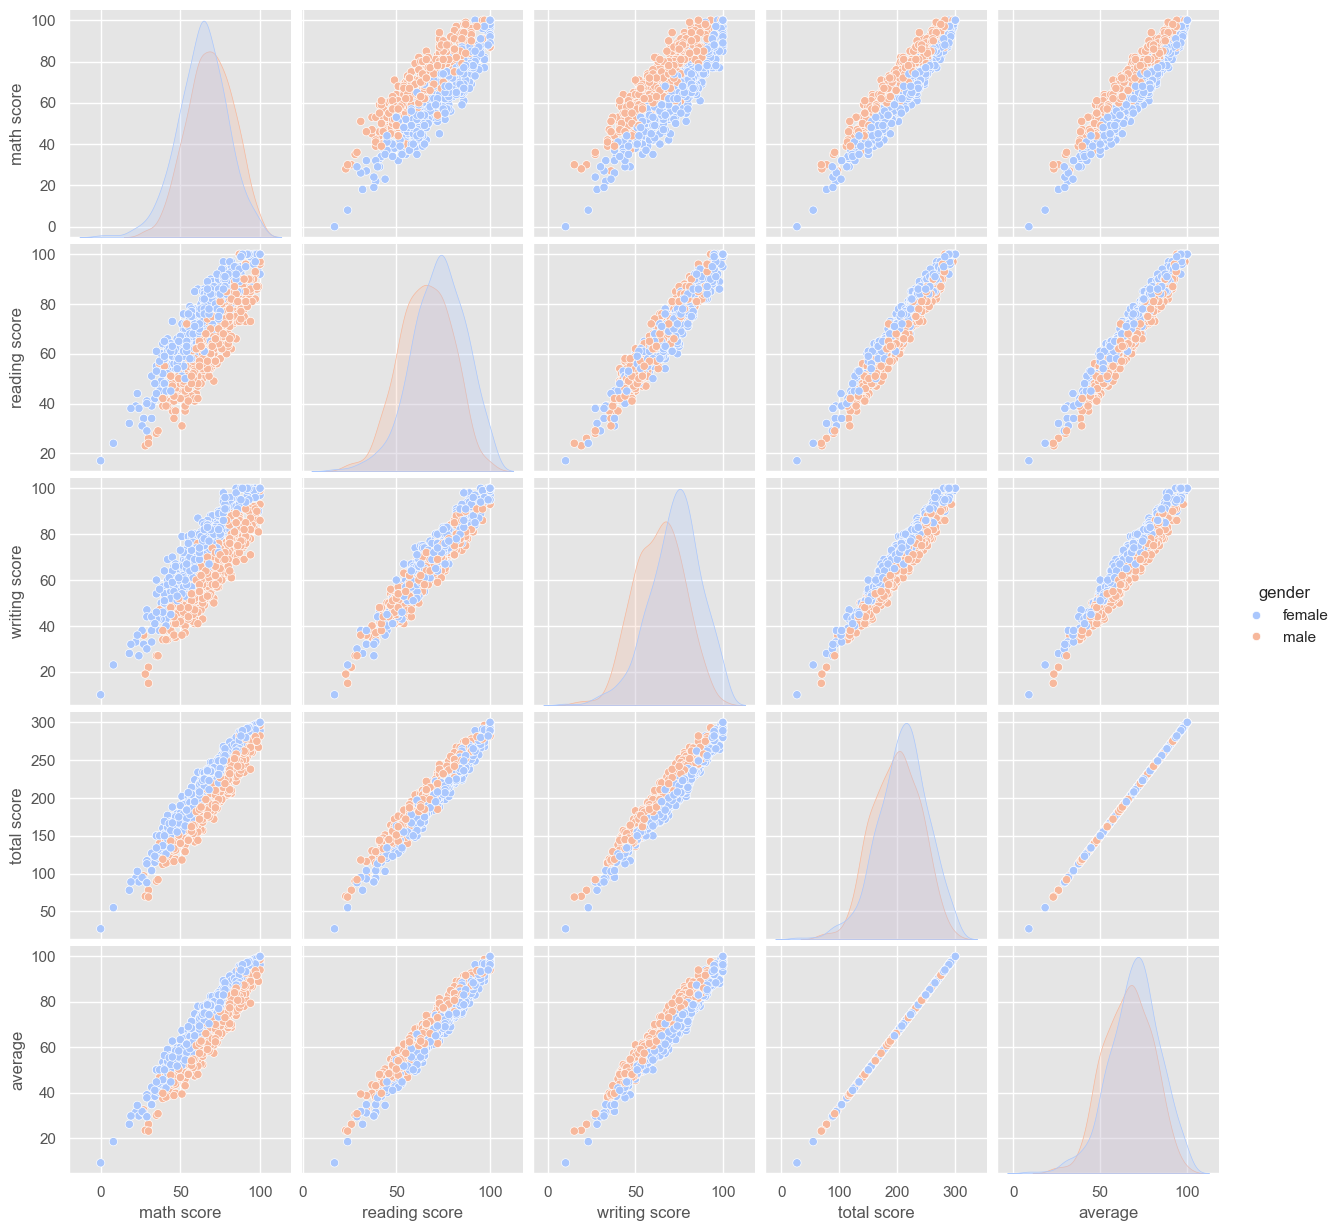

In [184]:
sns.pairplot(df, hue="gender", palette="coolwarm")
plt.show()

Multivariate Analysis Insights:

1. All subject scores increase linearly with each other.
2. The correlation heatmap suggests a strong correlation between reading and writing scores.
3. No extreme outliers were detected in the data.

3D Scatter Plot Of {Math, Writing, Reading} Scores by Gender

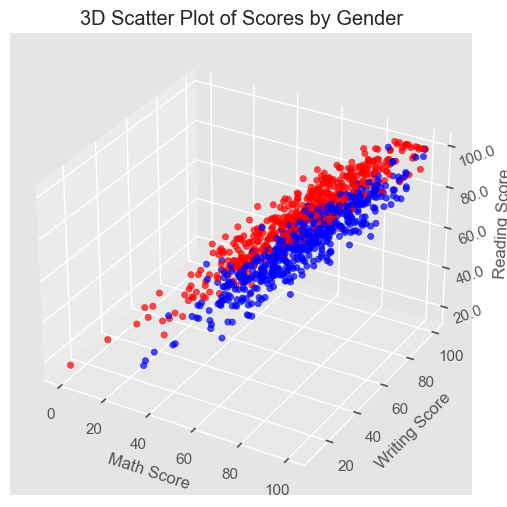

In [185]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Mapping gender to colors
colors = {'male': 'blue', 'female': 'red'}
df['color'] = df['gender'].map(colors)

ax.scatter(df['math score'], df['writing score'], df['reading score'], c=df['color'], alpha=0.7)

ax.set_xlabel("Math Score")
ax.set_ylabel("Writing Score")
ax.set_zlabel("Reading Score")
ax.set_zticklabels(ax.get_zticks(), rotation=20)
plt.title("3D Scatter Plot of Scores by Gender")

plt.show()

OUTLIERS

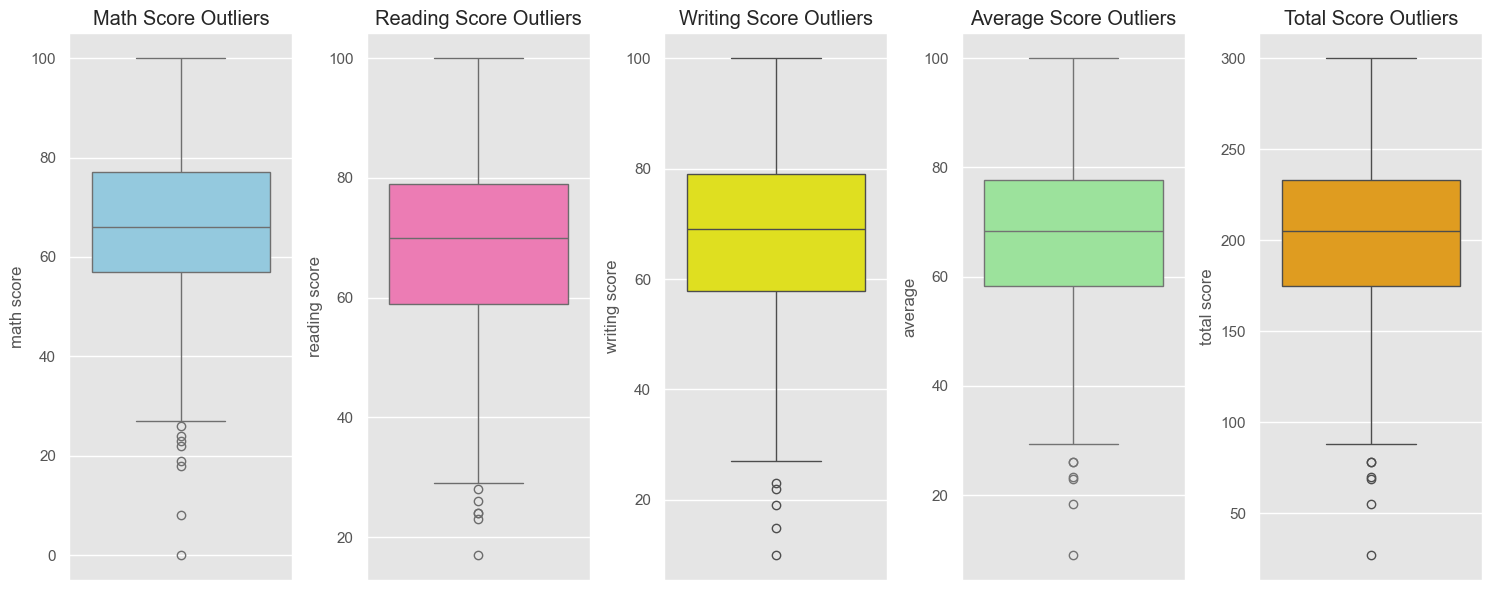

In [186]:
# Outliers Detection with Boxplots
plt.figure(figsize=(18, 6))

plt.subplot(161)
sns.boxplot(df['math score'], color='skyblue')
plt.title("Math Score Outliers")

plt.subplot(162)
sns.boxplot(df['reading score'], color='hotpink')
plt.title("Reading Score Outliers")

plt.subplot(163)
sns.boxplot(df['writing score'], color='yellow')
plt.title("Writing Score Outliers")

plt.subplot(164)
sns.boxplot(df['average'], color='lightgreen')
plt.title("Average Score Outliers")

plt.subplot(165)
sns.boxplot(df['total score'], color='orange')
plt.title("Total Score Outliers")

plt.tight_layout()
plt.show()

HEATMAP

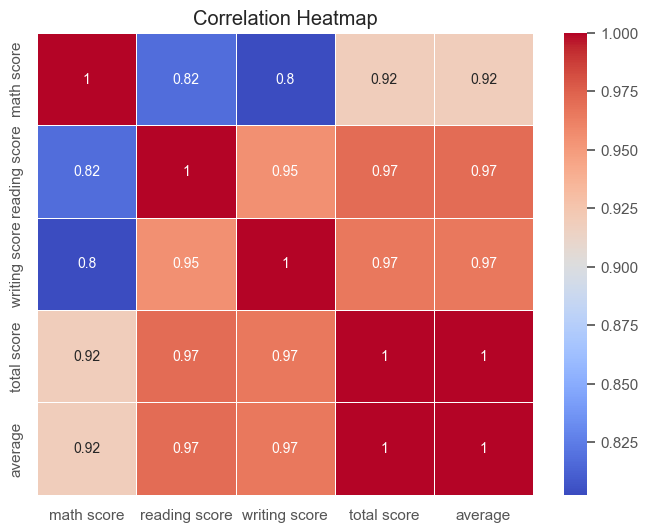

In [187]:
# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Conclusion

1. Student performance is influenced by lunch type, race/ethnicity, and parental education level.
2. Females have a higher pass percentage and tend to be top scorers, especially in reading and writing.
3. Students with standard lunches generally perform better than those with free/reduced lunches.
4. The test preparation course has minimal impact on overall performance, though it provides some benefits.
5. Parental education level plays a crucial role in student success, with higher-educated parents correlating with better scores.